EDA for UNICORN COMPANIES 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
df=pd.read_csv('C:/Users/DELL/Desktop/learnings22/unicorn_startups.csv')

In [209]:
df=df.drop(['Unnamed: 0'], axis=1)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


 DATA CLEANING 

In [210]:
#number of rows and columns
df.shape

(936, 7)

In [211]:
#determining missing values
df.isna().sum()

Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

In [212]:
df.duplicated().sum()

0

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           936 non-null    object
 1   Valuation ($B)    936 non-null    object
 2   Date Joined       936 non-null    object
 3   Country           936 non-null    object
 4   City              921 non-null    object
 5   Industry          936 non-null    object
 6   Select Investors  935 non-null    object
dtypes: object(7)
memory usage: 51.3+ KB


In [214]:
df.Country.unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Indonesia', 'Germany', 'Mexico',
       'Canada', 'Turkey', 'South Korea', 'Netherlands', 'Israel',
       'Colombia', 'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria',
       'Ireland', 'Singapore', 'Vietnam', 'United Arab Emirates',
       'Switzerland', 'Argentina', 'Spain', 'Japan', 'Luxembourg',
       'Nigeria', 'Santa Clara', 'Finland', 'Philippines', 'Denmark',
       'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Malaysia', 'Czech Republic', 'Croatia',
       'United States,', 'Indonesia,'], dtype=object)

In [215]:
df["Country"].replace({"Hong Kong": "China", "Santa Clara": "United States"}, inplace=True)
df.Country.unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'India', 'Indonesia', 'Germany', 'Mexico', 'Canada',
       'Turkey', 'South Korea', 'Netherlands', 'Israel', 'Colombia',
       'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria', 'Ireland',
       'Singapore', 'Vietnam', 'United Arab Emirates', 'Switzerland',
       'Argentina', 'Spain', 'Japan', 'Luxembourg', 'Nigeria', 'Finland',
       'Philippines', 'Denmark', 'Senegal', 'Bermuda', 'Norway',
       'South Africa', 'Chile', 'Thailand', 'Malaysia', 'Czech Republic',
       'Croatia', 'United States,', 'Indonesia,'], dtype=object)

In [216]:
df.nunique(axis=0)

Company             935
Valuation ($B)      192
Date Joined         589
Country              45
City                239
Industry             17
Select Investors    920
dtype: int64

In [217]:
df.Industry.value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

In [218]:
df.loc[df['Industry'] == 'Finttech', 'Industry'] = 'Fintech'
df.loc[df['Industry'] == 'Artificial intelligence', 'Industry'] = 'Artificial Intelligence'
df.Industry.value_counts()

Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial Intelligence                 73
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: Industry, dtype: int64

In [219]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           936 non-null    object        
 1   Valuation ($B)    936 non-null    object        
 2   Date Joined       936 non-null    datetime64[ns]
 3   Country           936 non-null    object        
 4   City              921 non-null    object        
 5   Industry          936 non-null    object        
 6   Select Investors  935 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 51.3+ KB


In [221]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [222]:
df['Valuation ($B)']=df['Valuation ($B)'].str.replace('$', '')
df['Valuation ($B)']=df['Valuation ($B)'].astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6384\3993831733.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation ($B)']=df['Valuation ($B)'].str.replace('$', '')


In [223]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [224]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           936 non-null    object        
 1   Valuation ($B)    936 non-null    float64       
 2   Date Joined       936 non-null    datetime64[ns]
 3   Country           936 non-null    object        
 4   City              921 non-null    object        
 5   Industry          936 non-null    object        
 6   Select Investors  935 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 51.3+ KB


In [226]:
import plotly.express as px


<AxesSubplot:ylabel='Industry'>

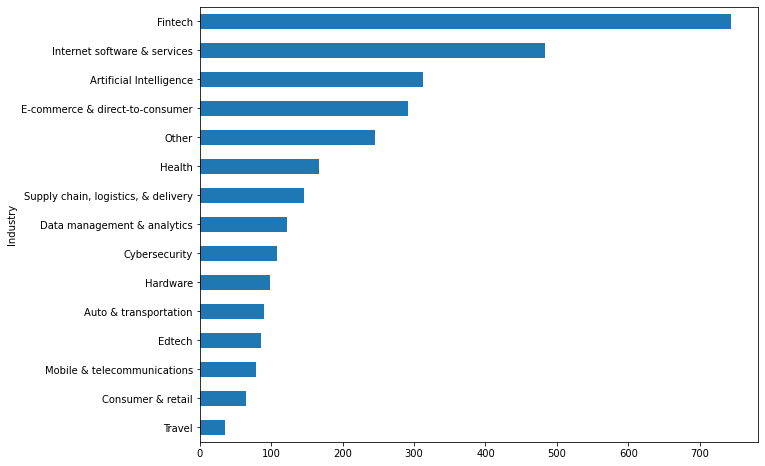

In [227]:
df.groupby('Industry')['Valuation ($B)'].sum().sort_values(ascending=True).plot.barh(figsize=(10,8))

In [228]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [229]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'],unit='s')
df['Year']=df['Date Joined'].dt.year
df=df.drop(['Date Joined'], axis=1)

In [230]:
df.head()

,Company,Valuation ($B),Country,City,Industry,Select Investors,Year
0,Bytedance,140.0,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100.3,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,Stripe,95.0,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014
3,Klarna,45.6,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
4,Canva,40.0,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018


In [232]:
df['Year'] = pd.to_datetime(df['Year'])

In [233]:
industry_value = df.groupby(by='Industry').sum().sort_values(by='Valuation ($B)', ascending=False)
industry_value

,Valuation ($B)
Industry,
Fintech,744.13
Internet software & services,483.76
Artificial Intelligence,312.84
E-commerce & direct-to-consumer,291.10
Other,245.46
Health,166.26
"Supply chain, logistics, & delivery",146.29
Data management & analytics,121.70
Cybersecurity,107.54


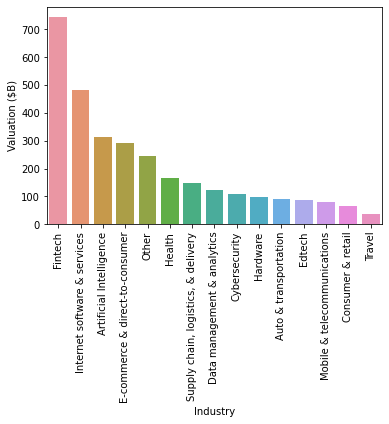

In [234]:
g = sns.barplot(data=industry_value, x = industry_value.index, y = 'Valuation ($B)')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

MARKET SHARED BY DIFFERENT INDUXTRIES

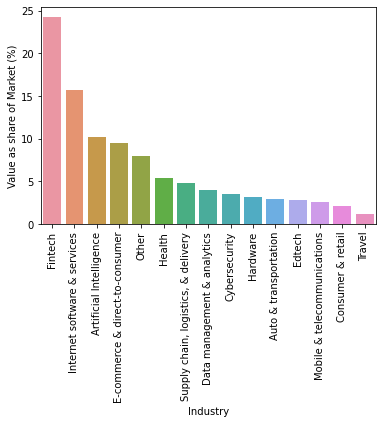

In [235]:
industry_value_per = industry_value['Valuation ($B)'].apply(lambda x: (x/ industry_value.sum()) * 100).round(2)
g = sns.barplot(data=industry_value_per, x = industry_value_per.index, y = 'Valuation ($B)')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_ylabel('Value as share of Market (%)');

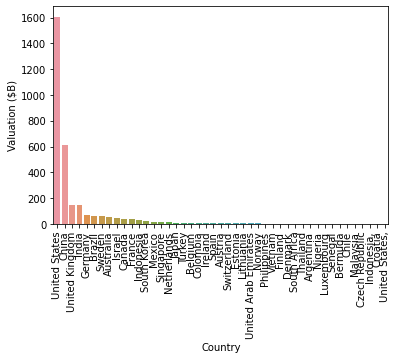

In [236]:
unicorns_bycountry= df.groupby(by='Country').sum().sort_values(by='Valuation ($B)', ascending=False)
g = sns.barplot(data=unicorns_bycountry, x =unicorns_bycountry.index, y = 'Valuation ($B)')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

The Average Amount of Investment by years

<AxesSubplot:xlabel='Year'>

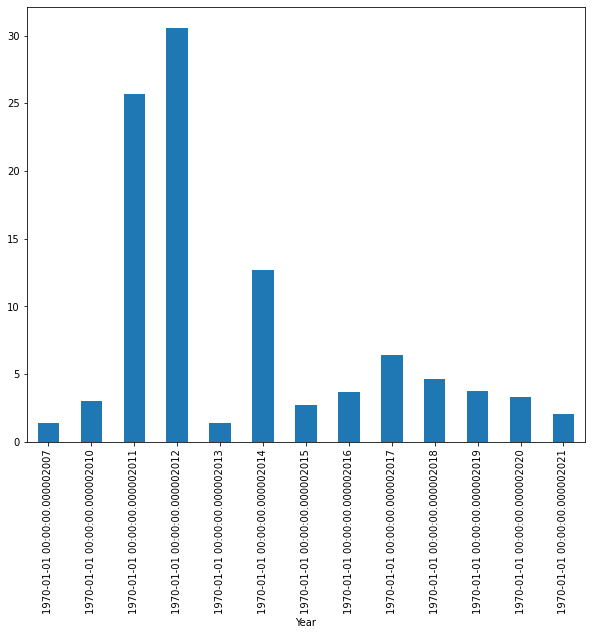

In [237]:
df.groupby('Year')['Valuation ($B)'].mean().plot(kind='bar',figsize=(10,8))

The Total Amount of Investment by years 2007 to 2021 - INDIA


<AxesSubplot:xlabel='Year'>

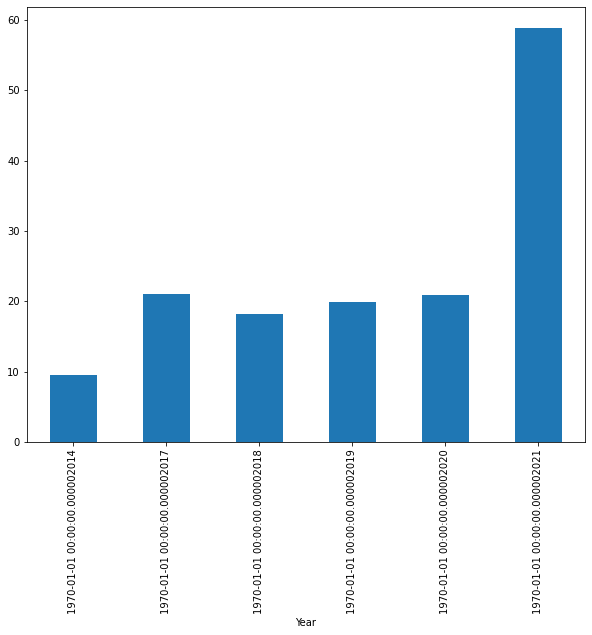

In [197]:
df_India=df[df['Country']=='India']
df_India.groupby('Year')['Valuation ($B)'].sum().plot.bar(figsize=(10,8))

<AxesSubplot:xlabel='City'>

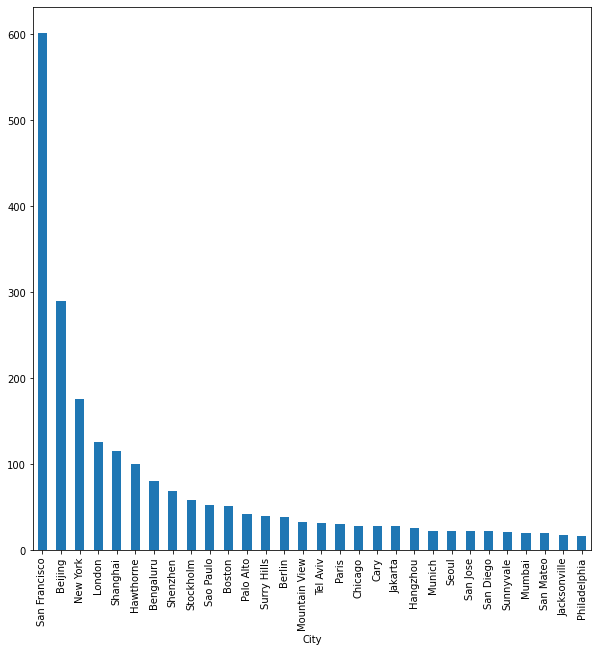

In [248]:

df.groupby('City')['Valuation ($B)'].sum().sort_values(ascending=False).head(30).plot.bar(figsize=(10,10))

In [255]:
df_india=df[df.Country=='India']

df_india.City.value_counts()

Bengaluru      25
Gurgaon         7
Mumbai          5
Gurugram        3
New Delhi       2
Pune            2
Noida           1
Faridabad       1
Thane           1
Bangalore       1
Chennai         1
Jaipur          1
Maharashtra     1
Name: City, dtype: int64

In [256]:
df_india.Industry.value_counts()

Fintech                                12
E-commerce & direct-to-consumer        12
Internet software & services            8
Supply chain, logistics, & delivery     6
Edtech                                  5
Auto & transportation                   2
Health                                  2
Other                                   2
Travel                                  1
Mobile & telecommunications             1
Name: Industry, dtype: int64

In [258]:
df_india[['Company','Valuation ($B)','Industry','Year']]

,Company,Valuation ($B),Industry,Year
12,BYJU's,21.00,Edtech,1970-01-01 00:00:00.000002017
53,OYO Rooms,9.60,Travel,1970-01-01 00:00:00.000002018
62,Dream11,8.00,Internet software & services,1970-01-01 00:00:00.000002019
80,National Stock Exchange of India,6.50,Fintech,1970-01-01 00:00:00.000002020
83,Ola Cabs,7.50,Auto & transportation,1970-01-01 00:00:00.000002014
115,Swiggy,5.50,"Supply chain, logistics, & delivery",1970-01-01 00:00:00.000002018
126,Meesho,4.90,Internet software & services,1970-01-01 00:00:00.000002021
153,CRED,4.01,Fintech,1970-01-01 00:00:00.000002021
193,Digit Insurance,3.50,Fintech,1970-01-01 00:00:00.000002021
199,Unacademy,3.44,Edtech,1970-01-01 00:00:00.000002020


In [259]:
df_india[df_india.Industry == 'Edtech']['Company']

12                           BYJU's
199                       Unacademy
215    Eruditus Executive Education
631                          UpGrad
898                         Vedantu
Name: Company, dtype: object

In [260]:
df_india[df_india.Industry == 'Internet software & services']['Company']

62                   Dream11
126                   Meesho
245                ShareChat
299    Mobile Premier League
683                     apna
794                DailyHunt
880                  Zetwerk
926                 NoBroker
Name: Company, dtype: object